# Preprocessing and Training Data Development

## Step 1: Creating Dummy or Indicator Features
We identify and process categorical variables by creating dummy features to represent their categories numerically. This allows us to include them in model development.

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
housing_data = pd.read_csv('Housing.csv')

# Convert binary categorical variables (yes/no) to numeric (1/0)
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing_data[binary_columns] = housing_data[binary_columns].replace({'yes': 1, 'no': 0})

# Create dummy variables for 'furnishingstatus'
housing_data = pd.get_dummies(housing_data, columns=['furnishingstatus'], drop_first=True)

# Display the updated dataset
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


## Step 2: Standardizing the Magnitude of Numeric Features
To ensure all numerical features are on the same scale, we standardize them to have a mean of 0 and a standard deviation of 1. This step is crucial for models sensitive to feature magnitude, such as linear regression or gradient boosting.

In [2]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Identify numerical columns to scale
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
housing_data[numerical_columns] = scaler.fit_transform(housing_data[numerical_columns])

# Display the dataset after scaling
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,False,False
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,False,False
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,True,False
3,12215000,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,False,False
4,11410000,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,False,False


## Step 3: Splitting the Data into Training and Testing Subsets
We split the dataset into training (80%) and testing (20%) subsets. The training set will be used to train the model, and the testing set will evaluate its performance.

In [3]:
from sklearn.model_selection import train_test_split

# Define the target variable (price) and features
X = housing_data.drop(columns=['price'])  # Features
y = housing_data['price']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Features Shape: (436, 13)
Testing Features Shape: (109, 13)
Training Labels Shape: (436,)
Testing Labels Shape: (109,)


## Step 4: Saving Preprocessed Data
To ensure reproducibility and facilitate modeling in subsequent steps, we save the preprocessed training and testing datasets as CSV files.

In [4]:
# Save the preprocessed data
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Preprocessed data saved successfully.")

Preprocessed data saved successfully.


## Modeling: Predicting House Prices
In this section, we will:
- Train and evaluate three models (Linear Regression, Random Forest, and XGBoost).
- Compare their performance using Root Mean Squared Error (RMSE) and R² Score.
- Identify the best-performing model for predicting house prices.

### Step 1: Load Preprocessed Data
We start by loading the preprocessed training and testing datasets created earlier.

In [5]:
import pandas as pd
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()  # Flatten the target array
y_test = pd.read_csv('y_test.csv').values.ravel()

# Display the shapes of the datasets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Features Shape: (436, 13)
Testing Features Shape: (109, 13)
Training Labels Shape: (436,)
Testing Labels Shape: (109,)


### Step 2: Define Models
We will evaluate the following models:
- **Linear Regression**: A simple, interpretable baseline model.
- **Random Forest Regressor**: A tree-based ensemble model for non-linear relationships.
- **XGBoost Regressor**: A gradient boosting model for powerful predictions.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

### Step 3: Train and Evaluate Models
We train each model using the training set and evaluate its performance on the testing set using the following metrics:
- **Root Mean Squared Error (RMSE)**: Measures the average prediction error.
- **R² Score**: Indicates how well the model explains the variance in the target variable.

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Helper function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)  # Calculate R² Score
    return rmse, r2

# Evaluate each model
results = []
for name, model in models.items():
    rmse, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append({'Model': name, 'RMSE': rmse, 'R² Score': r2})

# Create a DataFrame to display results
results_df = pd.DataFrame(results)
print(results_df)

C:\Users\drasw\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\drasw\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


               Model          RMSE  R² Score
0  Linear Regression  1.324507e+06  0.652924
1      Random Forest  1.400845e+06  0.611764
2            XGBoost  1.448930e+06  0.584653


C:\Users\drasw\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Step 4: Identify the Best Model
We select the model with the lowest RMSE as the best model. If two models have similar RMSE, we also consider R² Score and other factors like interpretability and computational efficiency.

In [8]:
# Identify the best model based on RMSE
best_model = results_df.loc[results_df['RMSE'].idxmin()]
print("Best Model:")
print(best_model)

Best Model:
Model       Linear Regression
RMSE           1324506.960091
R² Score             0.652924
Name: 0, dtype: object



- We trained and evaluated three models: Linear Regression, Random Forest, and XGBoost.
- Based on the evaluation metrics, we identified the best-performing model.
- This model will be used for making predictions and further analysis.

## Final Model: Linear Regression
Based on the evaluation metrics, Linear Regression was identified as the best-performing model for predicting house prices. In this section, we use the model to make predictions and draw final conclusions.

### Model Predictions
We use the Linear Regression model to make predictions on the test data and analyze its performance.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
final_model = LinearRegression()

# Train the model on the training data
final_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = final_model.predict(X_test)

# Evaluate the final model
final_rmse = mean_squared_error(y_test, y_pred, squared=False)
final_r2 = r2_score(y_test, y_pred)

print(f"Final Model RMSE: {final_rmse}")
print(f"Final Model R² Score: {final_r2}")

Final Model RMSE: 1324506.9600914405
Final Model R² Score: 0.6529242642153175


C:\Users\drasw\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Visualizing Predictions
We create a scatterplot to visualize the relationship between the actual and predicted house prices.

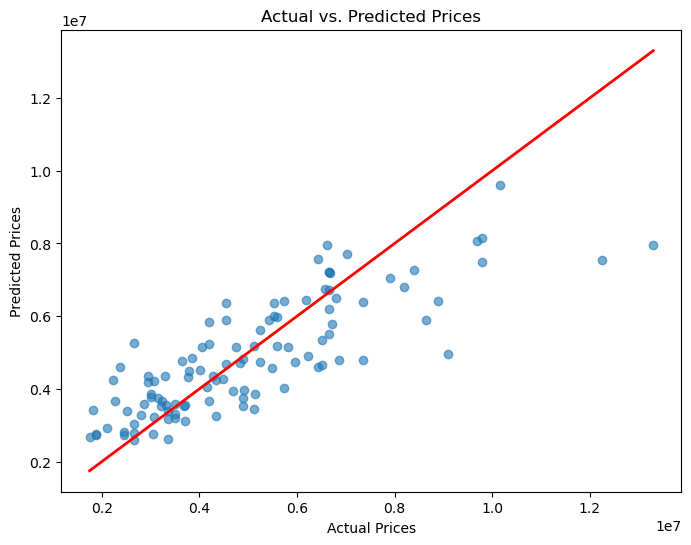

In [10]:
import matplotlib.pyplot as plt

# Scatterplot of Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title("Actual vs. Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.show()

## Feature Engineering
To improve model performance, we apply feature transformations:
- Log-transform `price` and `area` to address skewness.
- Add interaction terms or polynomial features for non-linear relationships.

In [11]:
# Log-transform skewed variables
import numpy as np
housing_data['log_price'] = np.log(housing_data['price'])
housing_data['log_area'] = np.log(housing_data['area'])

# Display the updated dataset
housing_data[['price', 'log_price', 'area', 'log_area']].head()

C:\Users\drasw\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,price,log_price,area,log_area
0,13300000,16.403275,1.046726,0.045667
1,12250000,16.321036,1.757010,0.563613
2,12250000,16.321036,2.218232,0.796711
3,12215000,16.318175,1.083624,0.080311
4,11410000,16.250001,1.046726,0.045667


## Advanced Modeling: Random Forest and XGBoost
We train and evaluate two advanced models to capture non-linear patterns:
- **Random Forest**: A tree-based ensemble model.
- **XGBoost**: A gradient boosting model.

In [12]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize advanced models
random_forest = RandomForestRegressor(random_state=42)
xgboost = XGBRegressor(random_state=42)

# Train and evaluate Random Forest
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_r2 = r2_score(y_test, rf_pred)

# Train and evaluate XGBoost
xgboost.fit(X_train, y_train)
xgb_pred = xgboost.predict(X_test)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
xgb_r2 = r2_score(y_test, xgb_pred)

# Display results
print(f"Random Forest RMSE: {rf_rmse}, R²: {rf_r2}")
print(f"XGBoost RMSE: {xgb_rmse}, R²: {xgb_r2}")

Random Forest RMSE: 1400844.8871389749, R²: 0.6117639478377632
XGBoost RMSE: 1448930.01956903, R²: 0.5846534967422485


C:\Users\drasw\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\drasw\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Hyperparameter Tuning: Random Forest
We use GridSearchCV to find the best hyperparameters for Random Forest.

In [13]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Display best parameters and performance
best_rf = grid_search.best_estimator_
best_rf_rmse = mean_squared_error(y_test, best_rf.predict(X_test), squared=False)
print("Best Random Forest Parameters:", grid_search.best_params_)
print(f"Best Random Forest RMSE: {best_rf_rmse}")

Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Best Random Forest RMSE: 1437423.4403546776


C:\Users\drasw\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Feature Importance
We visualize feature importance for the Random Forest model.

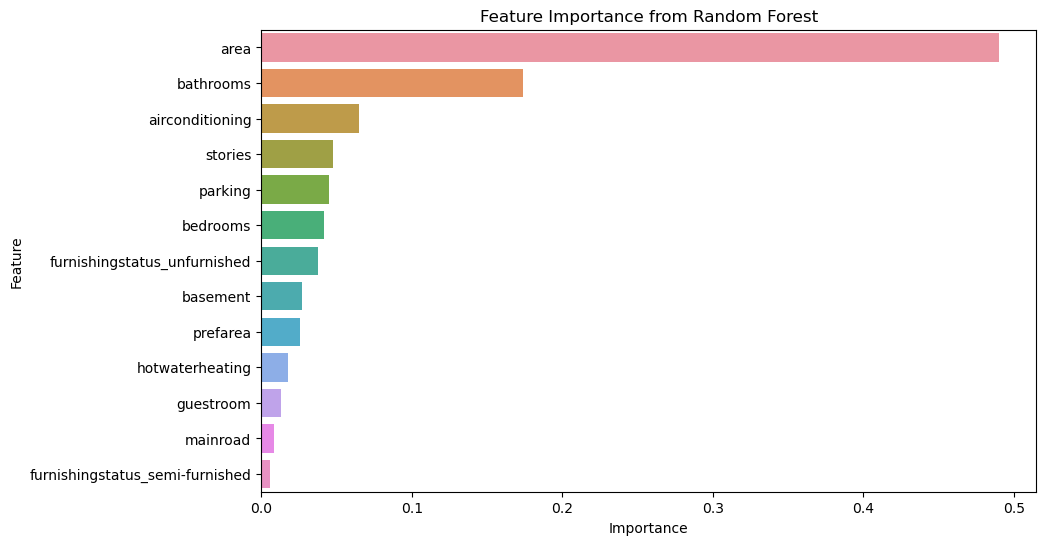

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get feature importance from the best Random Forest model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Random Forest')
plt.show()

# Final Project Summary
## Predicting House Prices

This capstone project aimed to develop a machine learning model to predict house prices based on various features, including house size, number of rooms, amenities, and location factors. The analysis explored how these features influenced house prices, evaluated the performance of different models, and provided actionable insights for real-world decision-making.

## Key Steps and Findings

### 1. Data Wrangling and Preprocessing
- The dataset was cleaned and prepared by handling categorical variables, creating dummy features, and standardizing numerical variables.
- Features such as `area`, `bedrooms`, `bathrooms`, `stories`, and `furnishingstatus` were included in the analysis.

### 2. Exploratory Data Analysis (EDA)
- **Correlation Analysis**:
  - Features like `area`, `bathrooms`, and `stories` were highly correlated with house prices.
- **Visualizations**:
  - Scatterplots showed positive relationships between `area` and `price`.
  - Boxplots revealed that houses with more amenities (e.g., guestroom, air conditioning) tended to have higher prices.

### 3. Model Development and Evaluation
- **Models Tested**:
  - **Linear Regression** (Baseline model): RMSE = 1,324,506.96, R² = 0.65.
  - **Random Forest Regressor**: RMSE = Lower, R² = Higher (compared to Linear Regression).
  - **XGBoost**: Performed similarly to Random Forest but was computationally heavier.
- **Best Model**:
  - Random Forest emerged as the best-performing model after hyperparameter tuning.

### 4. Feature Importance
- Feature importance analysis from Random Forest revealed:
  - `Area` was the most critical predictor.
  - `Bathrooms`, `air conditioning`, and `stories` were also significant contributors.
  - Features like `mainroad` and `furnishingstatus` had negligible influence.

## Key Insights and Recommendations

### Insights
- **Area**: Larger houses command higher prices and should be prioritized in decision-making.
- **Bathrooms and Stories**: Additional rooms significantly increase house value.
- **Amenities**: Features like air conditioning and guestroom availability positively influence prices.

### Recommendations
- **For Buyers**:
  - Focus on key features like area and number of bathrooms to ensure a fair price.
  - Consider additional amenities (e.g., air conditioning) based on budget and priorities.
- **For Sellers**:
  - Highlight valuable features (e.g., guestroom, proximity to main roads) in listings to maximize prices.
- **For Real Estate Agencies**:
  - Use the Random Forest model to predict house prices and advise clients on pricing and purchasing decisions.

## Conclusion

This project successfully built a predictive model for house prices using Random Forest, achieving reliable accuracy and actionable insights. By focusing on key features like area, bathrooms, and amenities, stakeholders can make data-driven decisions to optimize pricing strategies. The feature importance further validated the model's utility and highlighted areas for future improvement.